<a href="https://colab.research.google.com/github/yamini1998m/-ML-Regression-ProjectTemplate.ipynb/blob/main/ML_Regression_ProjectTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Retail Sales Prediction





```

```

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Project Name**    -Retail Sales Prediction
##### **Member** - Yamini Mehendwariya

# **Project Summary -**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **GitHub Link -**

https://github.com/yamini1998m/-ML-Regression-ProjectTemplate.ipynb

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats



### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
store_data=pd.read_csv('/content/drive/MyDrive/store.csv')
rosemaan_data=pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')
store_data.head()

<ipython-input-3-ae69a59a0649>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rosemaan_data=pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
rosemaan_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
store_data.shape



(1115, 10)

We came to know that store data contains 1115 values and 10 features

In [6]:
rosemaan_data.shape

(1017209, 9)

we see here that rosemaan dataset consists 1017209 values and 10 features

### Dataset Information

In [7]:
# Dataset Info
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
rosemaan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
store_data.duplicated().sum()

0

We See here ,there are no duplicate value in this data set


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are many null values in these columns:- CompetitionOpenSinceMonth ,CompetitionOpenSinceYear,Promo2sinceWeek,Promo2SinceYear,PromoInterval

and also CompetitionDistance have 3 null values .

we have to clear it.



# 1.   **CompetitionDistance**





In [11]:
store_data[pd.isnull(store_data['CompetitionDistance'])]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


To fill up these null values there are so many ways like(0,mean,median,mode).We have to replace these null values by median

In [12]:
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(),inplace=True)

In [13]:
store_data['CompetitionDistance'].isnull().sum()

0



# 2. 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'




There are not much information provided to these data. Also we observe from dataset that where the Promo2 has value equals to zero there are Nan values for these columns. That means the store which do not wat promotion they have null values in promointerval , promo2sinceweek and so on.So for this purpose the best way to fill those features is to assign value equals to zero.

In [14]:
ds=store_data.copy()

In [15]:
## code for replacing Nan values with 0.

## Replacing Nan values with 0 in CompetitionOpenSinceMonth
ds['CompetitionOpenSinceMonth'] = ds['CompetitionOpenSinceMonth'].fillna(0)

## Replacing Nan values with 0 in CompetitionOpenSinceYear
ds['CompetitionOpenSinceYear'] = ds['CompetitionOpenSinceYear'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceWeek
ds['Promo2SinceWeek'] = ds['Promo2SinceWeek'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceYear
ds['Promo2SinceYear'] = ds['Promo2SinceYear'].fillna(0)

## Replacing Nan values with 0 in PromoInterval
ds['PromoInterval'] = ds['PromoInterval'].fillna(0)

## Now checking Nan values
ds.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### What did you know about your dataset?

Answer Here
        There are two datasets are given from which we have to predict jtheir daily sales for upto six weeks.

1.   Rossmann Stores Data.csv - historical data including Sales
                    It has  1017209 entries and 9 columns and here there is no null values in any entry.
2.   store.csv - supplemental information about the stores
                    It has 1115 entries and 10 variables and here there is some null values but we treat that values with mean,median,mode and 0 .
                    'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'



# Merge the Rossmann_df and Store_df csv by column 'Store' as in both csv Store column is common.

In [16]:
ds_final=pd.merge(rosemaan_data,ds,on='Store',how='left')
ds_final.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [17]:
ds_final.shape

(1017209, 18)

# **3. Data Wrangling**

# **Changing different dtypes to int type.**

In [18]:
# code for changing StateHoliday dtype from object to int.
ds_final.loc[ds_final['StateHoliday'] == '0', 'StateHoliday'] = 0
ds_final.loc[ds_final['StateHoliday'] == 'a', 'StateHoliday'] = 1
ds_final.loc[ds_final['StateHoliday'] == 'b', 'StateHoliday'] = 2
ds_final.loc[ds_final['StateHoliday'] == 'c', 'StateHoliday'] = 3
ds_final['StateHoliday'] = ds_final['StateHoliday'].astype(int, copy=False)

print('levels :', ds_final['StateHoliday'].unique(), '; data type :', ds_final['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


In [19]:
# code for changing Assortment dtype from object to int.
ds_final.loc[ds_final['Assortment'] == 'a', 'Assortment'] = 0
ds_final.loc[ds_final['Assortment'] == 'b', 'Assortment'] = 1
ds_final.loc[ds_final['Assortment'] == 'c', 'Assortment'] = 2
ds_final['Assortment'] = ds_final['Assortment'].astype(int, copy=False)

print('levels :', ds_final['Assortment'].unique(), '; data type :', ds_final['Assortment'].dtype)

levels : [0 2 1] ; data type : int64


In [20]:
# code for changing StoreType dtype from object to int.
ds_final.loc[ds_final['StoreType'] == 'a', 'StoreType'] = 0
ds_final.loc[ds_final['StoreType'] == 'b', 'StoreType'] = 1
ds_final.loc[ds_final['StoreType'] == 'c', 'StoreType'] = 2
ds_final.loc[ds_final['StoreType'] == 'd', 'StoreType'] = 3
ds_final['StoreType'] = ds_final['StoreType'].astype(int, copy=False)

print('levels :', ds_final['StoreType'].unique(), '; data type :', ds_final['StoreType'].dtype)

levels : [2 0 3 1] ; data type : int64


In [21]:
# code for changing format of date from object to datetime
ds_final['Date'] = pd.to_datetime(ds_final['Date'], format= '%Y-%m-%d')

In [22]:
ds_final['CompetitionOpenSinceYear']= ds_final['CompetitionOpenSinceYear'].astype(int)
ds_final['Promo2SinceYear']= ds_final['Promo2SinceYear'].astype(int)

In [23]:
ds_final['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(ds_final['Date']).month

In [24]:
ds_final['CompetitionDistance']= ds_final['CompetitionDistance'].astype(int)
ds_final['Promo2SinceWeek']= ds_final['Promo2SinceWeek'].astype(int)

## ***2. Understanding Your Variables***

In [25]:
ds_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [26]:
# Dataset Columns
ds_final.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [27]:
# Dataset Describe
ds_final.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,4.516279e-02,1.786467e-01,1.207467e+00,9.351412e-01,5.422021e+03,5.846762e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,2.836559e-01,3.830564e-01,1.365376e+00,9.938011e-01,7.706918e+03,3.326097e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,6.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,6.880000e+03,8.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


### Variables Description


*   Id - an Id that represents a (Store, Date) duple within the test set
*  Store - a unique Id for each store
*   Sales - the turnover for any given day (this is what you are predicting)
*   Customers - the number of customers on a given day

*   Open - an indicator for whether the store was open: 0 = closed, 1 = open
*  StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

*   SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
*   StoreType - differentiates between 4 different store models: a, b, c, d

*   Assortment - describes an assortment level: a = basic, b = extra, c = extended
*   CompetitionDistance - distance in meters to the nearest competitor store

*   CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

*   Promo - indicates whether a store is running a promo on that day

*   Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

*   Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
*   PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

























### Check Unique Values for each variable.

In [28]:
# Check Unique Values for each variable.
for i in ds_final.columns:
   print(i,ds_final[i].unique())

Store [   1    2    3 ... 1113 1114 1115]
DayOfWeek [5 4 3 2 1 7 6]
Date ['2015-07-31T00:00:00.000000000' '2015-07-30T00:00:00.000000000'
 '2015-07-29T00:00:00.000000000' '2015-07-28T00:00:00.000000000'
 '2015-07-27T00:00:00.000000000' '2015-07-26T00:00:00.000000000'
 '2015-07-25T00:00:00.000000000' '2015-07-24T00:00:00.000000000'
 '2015-07-23T00:00:00.000000000' '2015-07-22T00:00:00.000000000'
 '2015-07-21T00:00:00.000000000' '2015-07-20T00:00:00.000000000'
 '2015-07-19T00:00:00.000000000' '2015-07-18T00:00:00.000000000'
 '2015-07-17T00:00:00.000000000' '2015-07-16T00:00:00.000000000'
 '2015-07-15T00:00:00.000000000' '2015-07-14T00:00:00.000000000'
 '2015-07-13T00:00:00.000000000' '2015-07-12T00:00:00.000000000'
 '2015-07-11T00:00:00.000000000' '2015-07-10T00:00:00.000000000'
 '2015-07-09T00:00:00.000000000' '2015-07-08T00:00:00.000000000'
 '2015-07-07T00:00:00.000000000' '2015-07-06T00:00:00.000000000'
 '2015-07-05T00:00:00.000000000' '2015-07-04T00:00:00.000000000'
 '2015-07-03T00:0

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Sales**

#### Chart - 1

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

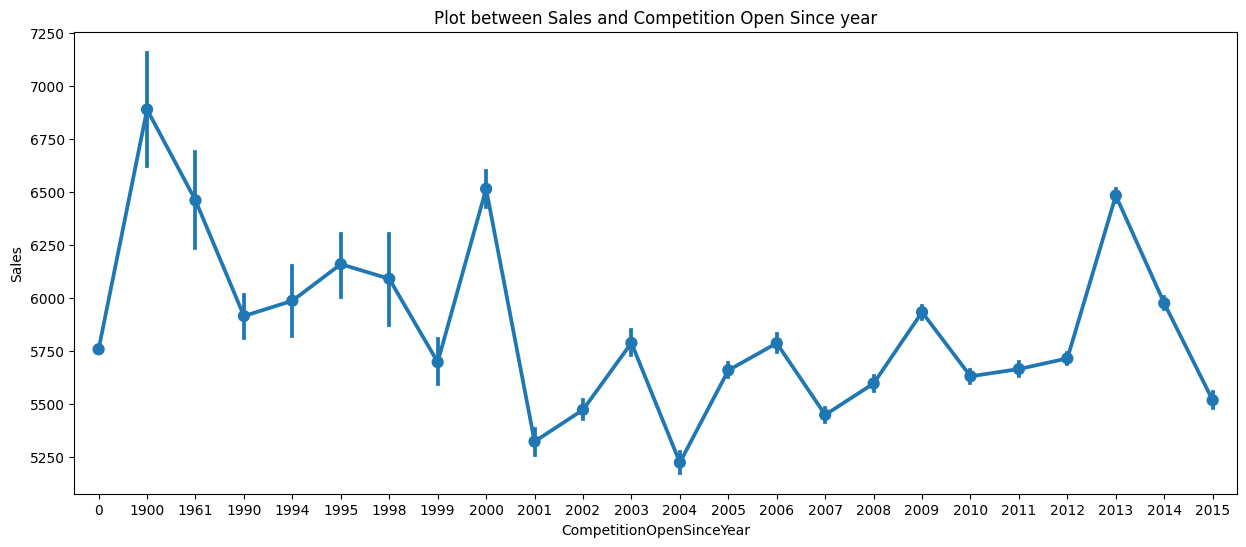

In [29]:
# Chart - 1 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=ds_final)
plt.title('Plot between Sales and Competition Open Since year')

From the Plot we can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

#### Chart - 2

Text(0.5, 1.0, 'Plot between Sales and Promo2 Since year')

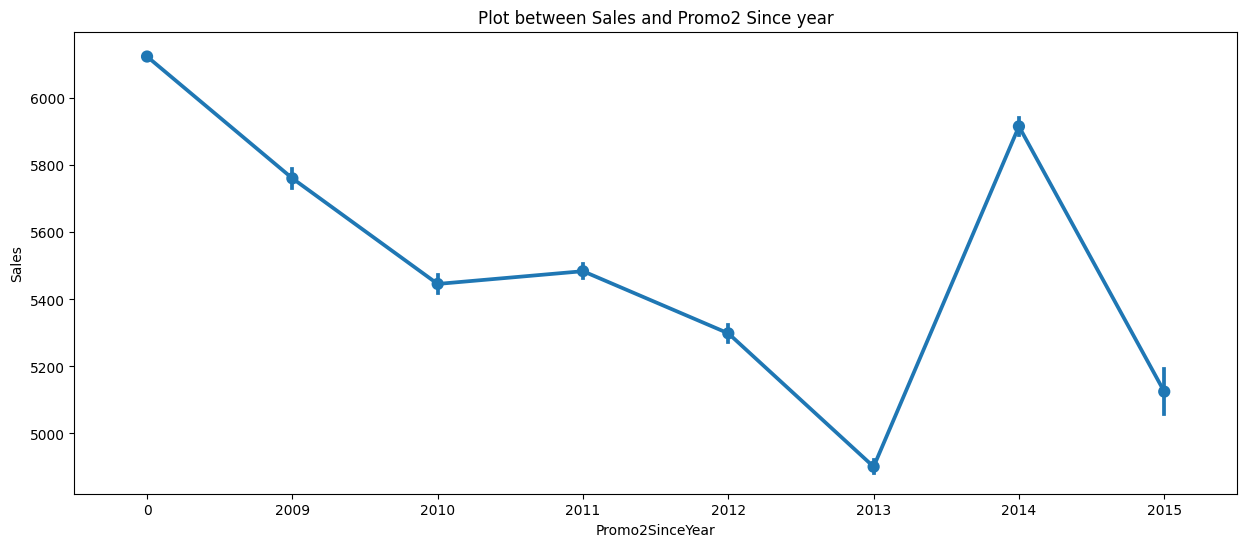

In [30]:
# Chart - 2 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=ds_final)
plt.title('Plot between Sales and Promo2 Since year')

Plot between Sales and promo2 since year shows that effect of sales of stores which continue their promotion. this data is available from yaer 2009 to 2015. Promo2 has very good effect on sales but in year 2013 sales be minimum and also in year 2012 and 2015 sales are very low.

#### Chart - 3

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Month')

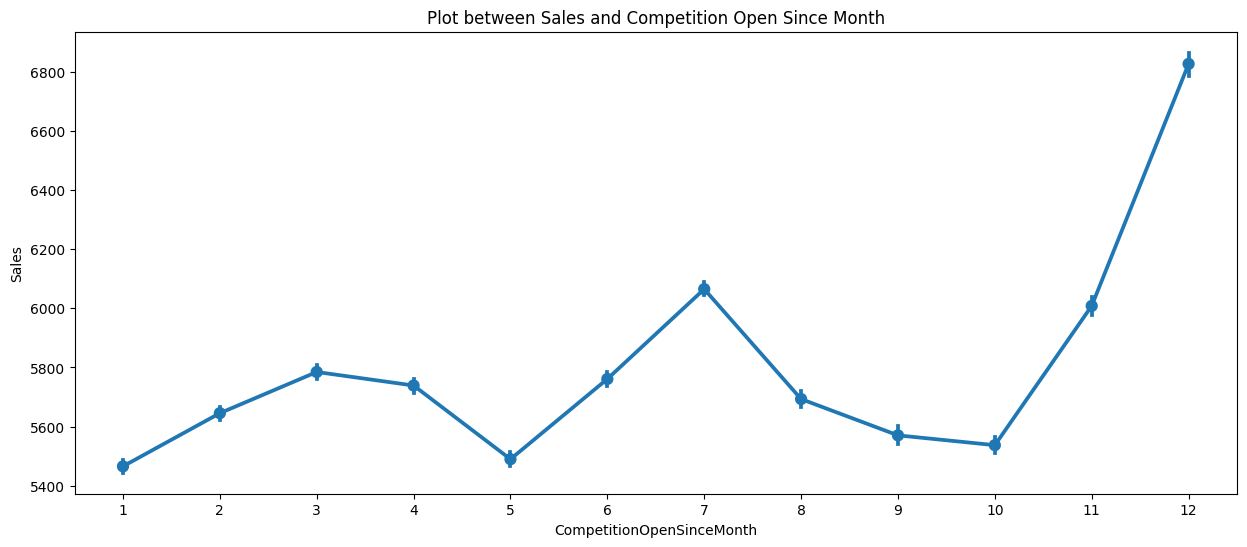

In [31]:

plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=ds_final)
plt.title('Plot between Sales and Competition Open Since Month')

Plot between Competition open since month and Sales explains the sales data in each month of a year. This data shows that sales after month november increases drastically. This is very clear that in December monthdue to Christmas Eve and New year celebration everone is buying. So sales of Rossmann store is very high in December.

#### Chart - 4

Text(0.5, 1.0, 'Plot between Sales and Day of Week')

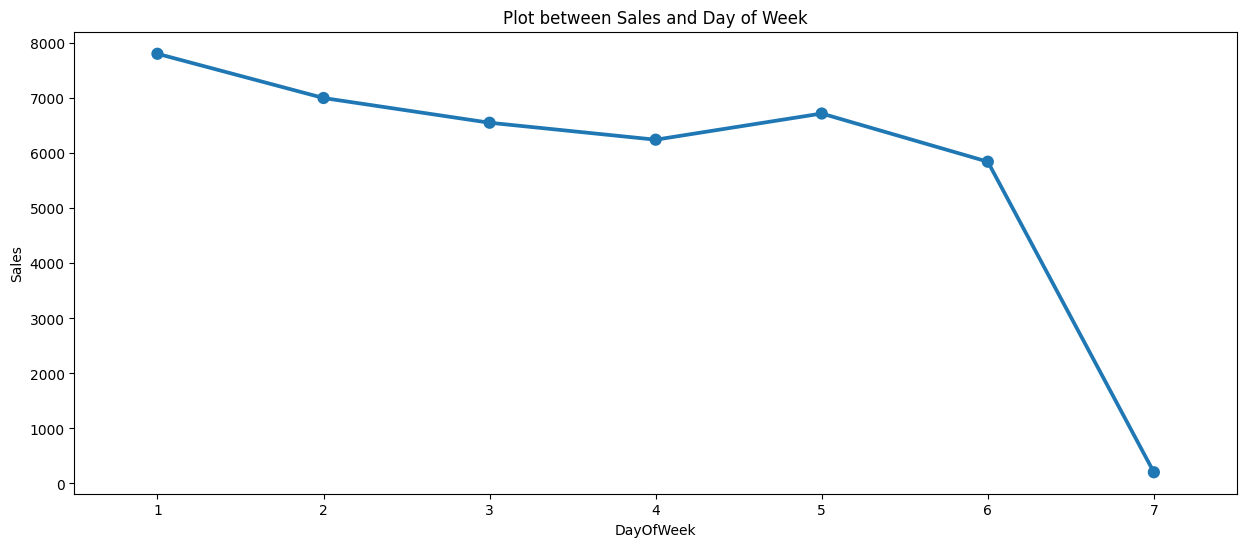

In [32]:
# Chart - 4 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=ds_final)
plt.title('Plot between Sales and Day of Week')

Plot between Sales and Days of week shows that maximum sales is on Monday and sales gradually decreasing to 6th day of week i.e. on Saturday. It also shows that sales on Sunday is almost near to zero as on sunday maximum stores are closed.

# **BoxPlot of sales between Assortment and store type**

#### Chart - 5

Text(0.5, 1.0, 'Boxplot For Sales Values')

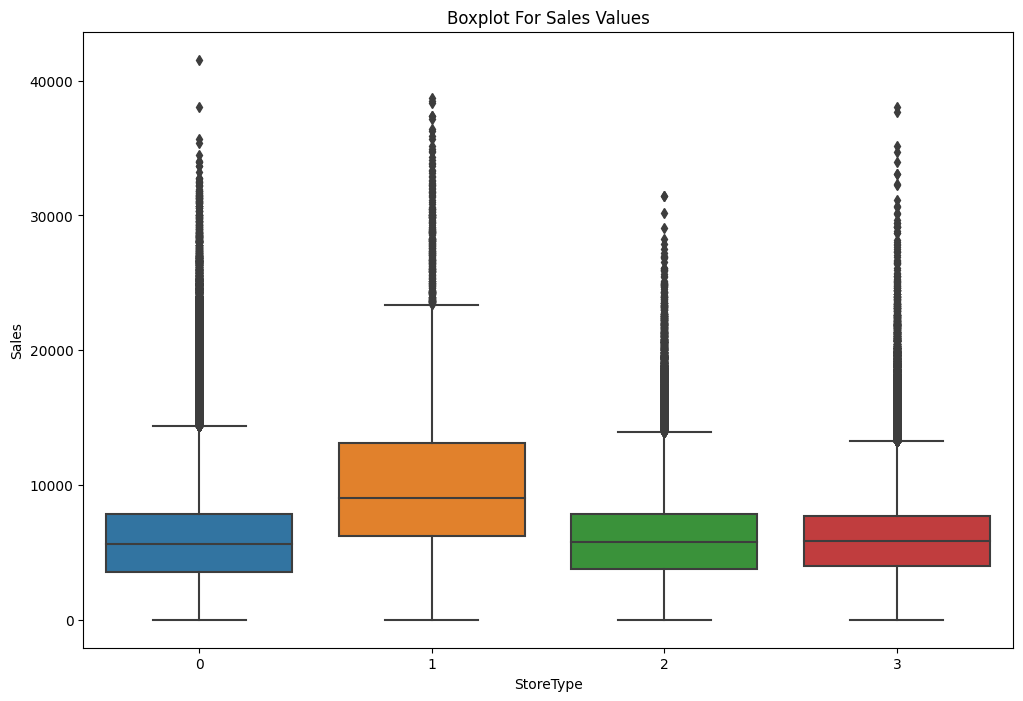

In [33]:
# Chart - 5 visualization code
plt.figure(figsize=(12, 8))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=ds_final)
plt.title('Boxplot For Sales Values')

#### Chart - 6

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment Level')

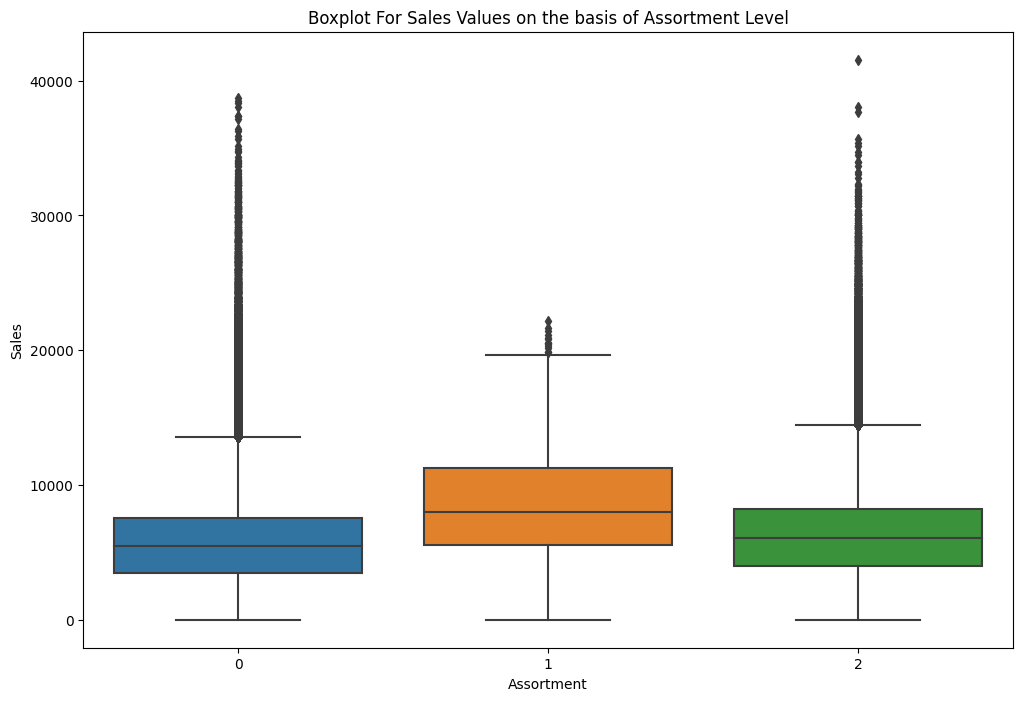

In [34]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 8))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=ds_final)
plt.title('Boxplot For Sales Values on the basis of Assortment Level')

# **Plot between Dayof Week and Open & promo.**

#### Chart - 7

Text(0.5, 1.0, 'Store Daily Open Countplot')

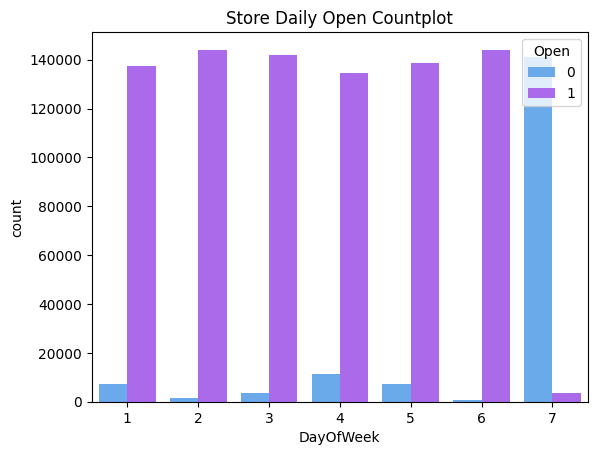

In [35]:
# Chart - 7 visualization code
sns.countplot(x= 'DayOfWeek', hue='Open', data= ds_final, palette='cool')
plt.title('Store Daily Open Countplot')

#### Chart - 8

Text(0.5, 1.0, 'Store Daily Promo Countplot')

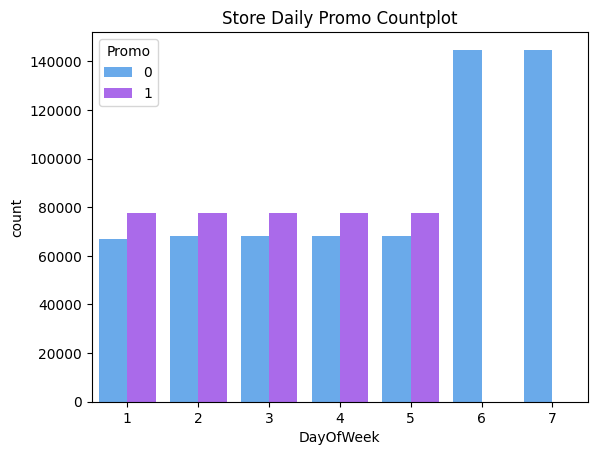

In [36]:
# Chart - 8 visualization code
sns.countplot(x= 'DayOfWeek', hue='Promo', data= ds_final, palette='cool')
plt.title('Store Daily Promo Countplot')

#### Chart - 9

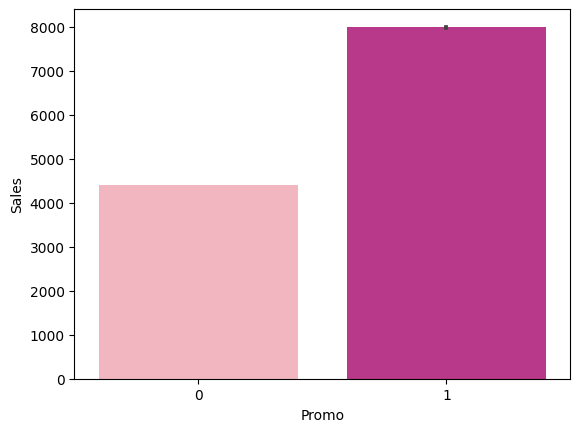

In [37]:
# Chart - 9 visualization code
promo_sales = sns.barplot(x="Promo", y="Sales", data=ds_final, palette='RdPu')

Barplot between promo and Sales shows the effect of promotion on Sales. Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.

# **StateHoliday and SchoolHoliday**

Sales during State Holiday

0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None

#### Chart - 10

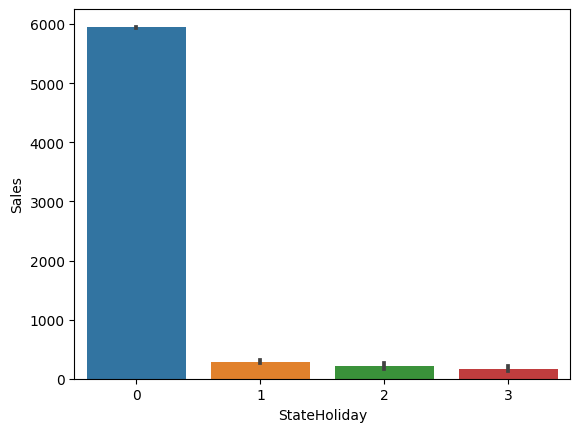

In [38]:
# Chart - 10 visualization code
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=ds_final)

#### Chart - 11

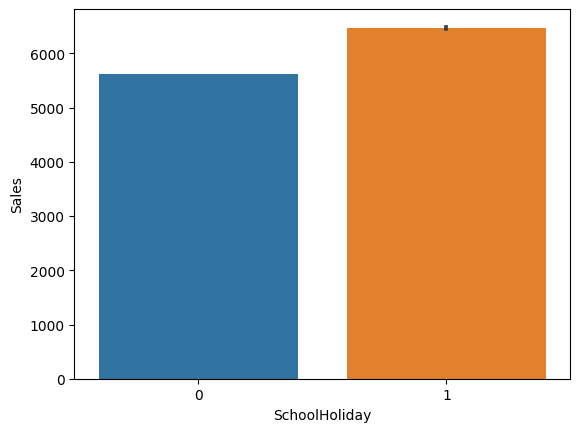

In [39]:
# Chart - 11 visualization code
schoolholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=ds_final)

We can observe that most of the stores remain closed during State and Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays. Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

# **Store Type**

In [40]:
# Chart - 12 visualization code
merged_df = pd.merge(rosemaan_data,ds, on='Store', how='left')

<ipython-input-41-bfdac59f9466>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
<ipython-input-41-bfdac59f9466>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
<ipython-input-41-bfdac59f9466>:9: FutureWarning: The default value of numeric_only in DataF

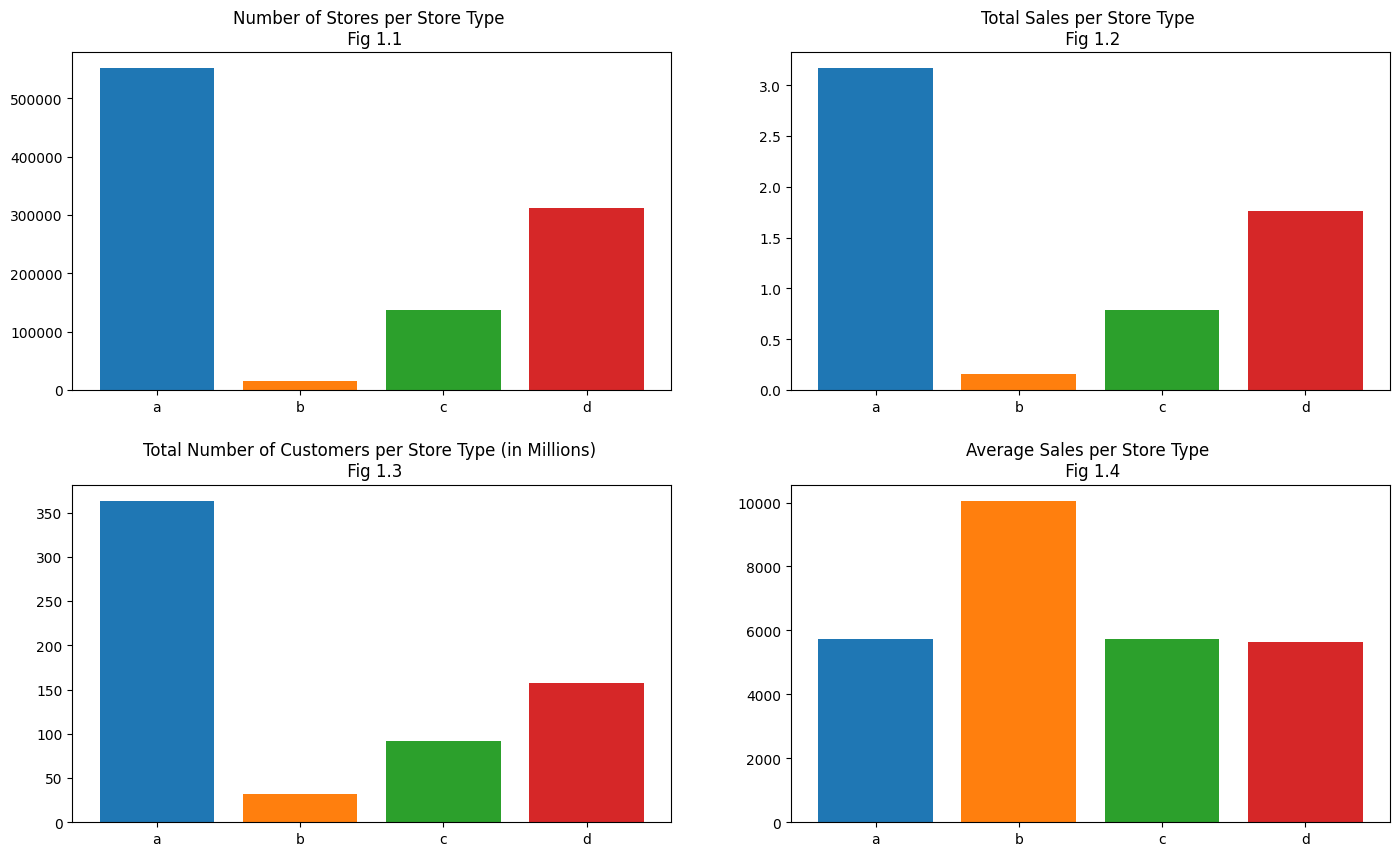

In [41]:
import itertools
fig, axes = plt.subplots(2, 2,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
axes[0,0].bar(merged_df.groupby(by="StoreType").count().Store.index ,merged_df.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type \n Fig 1.2")
axes[1,0].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,1].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Sales per Store Type \n Fig 1.4")
plt.show()

From this training set we can see that Storetype A has the highest number of branches,sales and customers from the 4 different storetypes. But this doesn't mean it's the best performing Storetype.

When looking at the average sales and number of customers, we see that actually it is Storetype B who was the highest average Sales and highest average Number of Customers.

# **Conclusions from EDA**

1- There are two datasets - 1) Rossmann.csv & 2) Store.csv

2- shape of Rossmann dataset = (1017209,8) shape of store dataset = (1115, 10)

3- In both dataset 'Store' column is common. So we do inner join on the basis of column 'Store'.

4- On looking on datasets we find lots of Nan values in Store dataset.

5- Try to replace Nan values with suitable values.
In CompetitionDistance column only 3 Nan values are there. So we replaced it with median.

6- Now for rest columns(CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, romointerval) there are lots of Nan values and best way to treat this values to replace with 0.

7- After combining shape of final dataset = (1017209,18)

8- Also there is some columns such as 'StateHoliday', 'SchoolHoliday' & 'Assortment' which contains object values. So, try to change into int by giving suitable values.

we also did some graphs analysis and conclusions we got are:-

   1- From plot sales and competition Open Since Month shows sales go increasing from Novemmber and highest in month December. This may be due to Christmas eve and New Year.

   2- From plot Sales and day of week, Sales highest on Monday and start declinig from tuesday to saturday and on Sunday Sales almost near to Zero. This is because on Sunday all stores be closed.

   3- Plot between promotion and Sales shows that promotion helps in increasing Sales. This similar trends also shows with customers.

   4- Plot between StateHolidays and sales shows that during Public holiday sales are actually high but for other holidays such as Easter and Christmas sales be very low. This is because During Easter and Christmas stores also closed so sales goes down.

#### Chart - 14 - Correlation Heatmap

<ipython-input-42-d0422e0d988a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = ds_final.corr()


<Axes: >

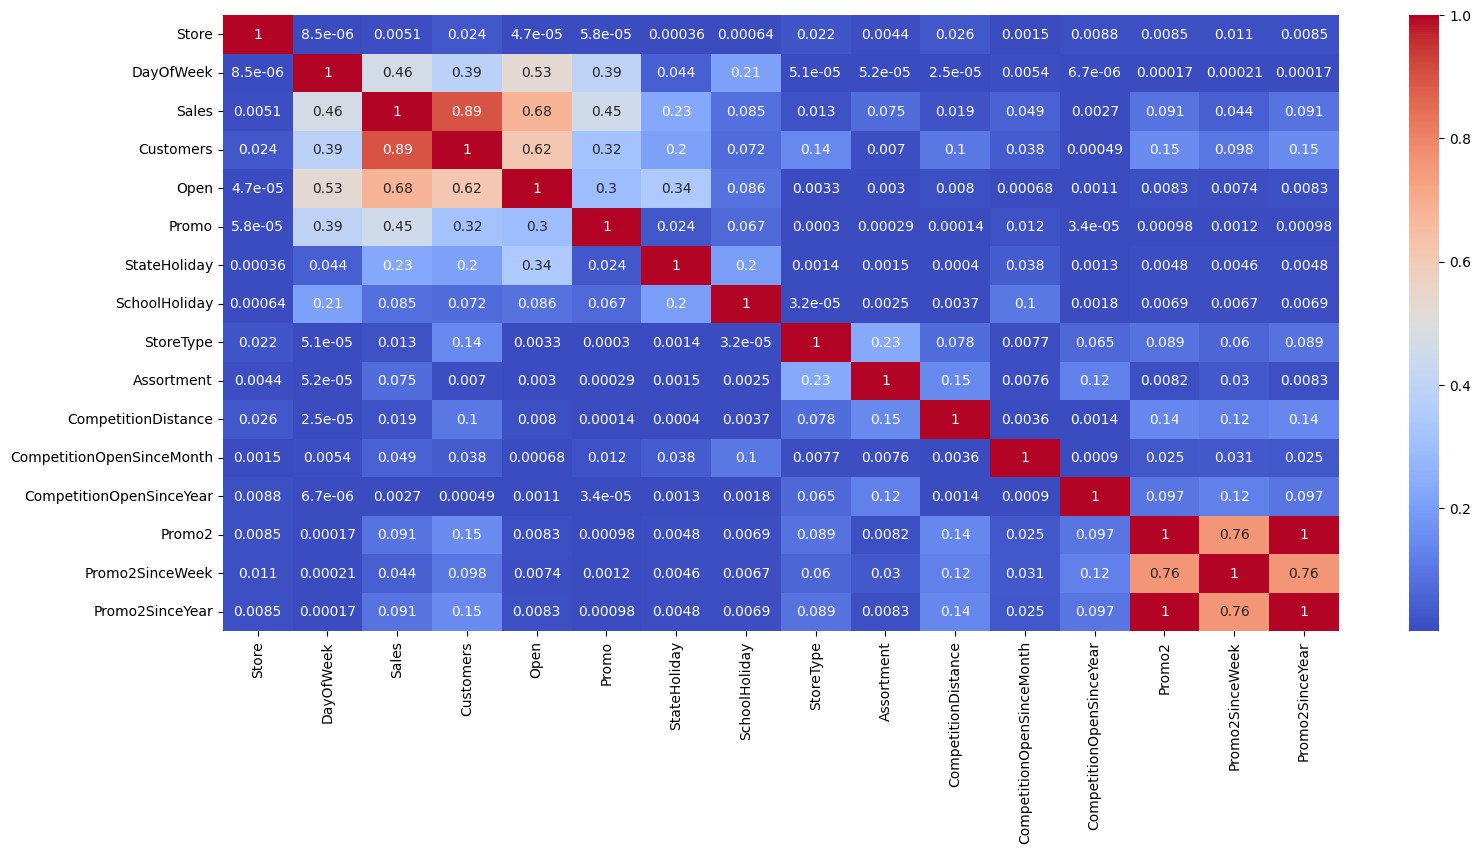

In [42]:
# Correlation Heatmap visualization code
plt.figure(figsize=(18,8))
correlation = ds_final.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## ***6. Feature Engineering & Data Pre-processing***

# **Multicollinearity**

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [44]:
calc_vif(ds_final[[i for i in ds_final.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.698849e+00
1,DayOfWeek,4.105225e+00
2,Customers,5.237282e+00
3,Open,9.376848e+00
4,Promo,1.917234e+00
5,StateHoliday,1.187994e+00
6,SchoolHoliday,1.330849e+00
7,StoreType,1.940349e+00
8,Assortment,2.045194e+00
9,CompetitionDistance,1.591292e+00


Multicolinearity of columns like 'Promo2SinceYear' is pretty high so we decided to drop it

In [45]:
calc_vif(ds_final[[i for i in ds_final.describe().columns if i not in ['Sales','Promo2SinceYear']]])

,variables,VIF
0,Store,3.696403
1,DayOfWeek,4.104888
2,Customers,5.236788
3,Open,9.375773
4,Promo,1.917192
5,StateHoliday,1.187994
6,SchoolHoliday,1.330832
7,StoreType,1.934515
8,Assortment,2.039582
9,CompetitionDistance,1.584854


# Analysis on Sales - Dependent variable

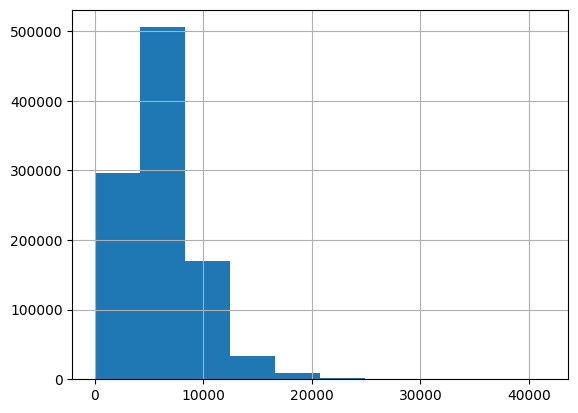

In [46]:
pd.Series(ds_final['Sales']).hist()
plt.show()

Now checking for number of sales =0.

In [47]:
ds_final[(ds_final.Open == 0) & (ds_final.Sales == 0)].count()[0]

172817

We see that **172817** times store is were temporarily closed for refurbishment. The best solution here is to get rid of closed stores and prevent the models to train on them and get false guidance

In [48]:
new_df = ds_final.drop(ds_final[(ds_final.Open == 0) & (ds_final.Sales == 0)].index)

In [49]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [50]:
new_df.shape


(844392, 18)

PromoInterval to be changed into dummies as it is categorical feature.

In [51]:
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


## ***7. ML Model Implementation***

In [52]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

### ML Model - 1

# **excluding rows which has sales =0**

We were confused about whether to include rows where sales value is 0.So first we built a model excluding sales value and then including those values

In [53]:
# defining dependent variable
dependent_variables = 'Sales'

# defining independent variable
independent_variables = list(new_df.columns.drop(['Promo2SinceYear','Date','Sales']))

In [54]:
independent_variables

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [55]:
# Create the data of independent variables
X = new_df[independent_variables].values

# Create the data of dependent variable
y = new_df[dependent_variables].values

In [56]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675513, 18)
(168879, 18)


# Linear Regression

In [57]:
reg = LinearRegression().fit(X_train, y_train)

In [58]:
reg.score(X_train, y_train)

0.7635206721712489

In [59]:
reg.coef_

array([-1.61198393e-01, -6.85494360e+01,  6.35538315e+00, -4.26503277e-12,
        1.29641730e+03, -1.28111956e+03,  3.62446443e+01,  2.76683058e+02,
        2.22275066e+02,  2.89088547e-02,  2.99506182e+01,  8.42814871e-02,
       -4.31749840e+01,  1.25018997e+01,  4.31749840e+01,  3.14329207e+01,
        1.38938365e+02, -2.13546269e+02])

In [60]:
reg.intercept_

699.0967159057836

In [61]:
y_pred = reg.predict(X_test)
y_pred

array([5324.52055538, 4849.53474672, 7238.83092913, ..., 4097.96470899,
       7772.06170472, 5367.78459861])

In [62]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([5490.38320365, 6804.10566331, 6698.58966523, ..., 7913.583262  ,
       6883.58642448, 6123.44589933])

In [63]:
y_test

array([ 5495,  5472,  7969, ...,  2938, 10413,  5828])

In [64]:
y_train

array([5409, 7339, 7807, ..., 4817, 6194, 5862])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [65]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2265482.0601440733
RMSE : 1505.151839564392


**LASSO**


In [66]:
L1 = Lasso(alpha = 0.2, max_iter=10000)

In [67]:
L1.fit(X_train, y_train)

Lasso(alpha=0.2, max_iter=10000)

In [68]:
y_pred_lasso = L1.predict(X_test)

In [69]:
L1.score(X_test, y_test)

0.7634806392437031

In [70]:
pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,5495,5325.566578
1,5472,4852.633900
2,7969,7238.801578
3,7384,6082.445661
4,13212,7828.577358
...,...,...
168874,16337,16397.542791
168875,9195,7061.771442
168876,2938,4100.387939
168877,10413,7773.380435


**Ridge**

In [71]:
L2 = Ridge(alpha = 0.5)
L2.fit(X_train, y_train)

Ridge(alpha=0.5)

In [72]:
L2.predict(X_test)

array([5324.52132743, 4849.53877333, 7238.83130418, ..., 4097.96761889,
       7772.05987742, 5367.78588992])

In [73]:
L2.score(X_test, y_test)

0.7634831985598826

**DECISION TREE**

In [74]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)



r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,r2)

MSE : 2006455.1648935971
RMSE : 1416.4939692401083
R2 : 0.7905256637111533


### ML Model - 2

**MODEL 2 (By taking whole Dataset)**

We use dummy variables for the column 'PromoInterval'

In [75]:
ds_final = pd.get_dummies(ds_final, columns=['PromoInterval'])
ds_final.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


In [76]:
ds_final.shape


(1017209, 21)

We define dependent and independent variables and convert them into arrays

In [77]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = ds_final.columns.drop(['Store', 'Promo2SinceYear','Date','Sales'])

In [78]:
# Create the data of independent variables
U = ds_final[indep_var].values

# Create the dependent variable data
v = ds_final[dep_var].values

In [79]:
ds_final[indep_var]

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,555,1,1,0,1,2,0,1270,7,2008,0,0,1,0,0,0
1,5,625,1,1,0,1,0,0,570,7,2007,1,13,0,0,1,0
2,5,821,1,1,0,1,0,0,14130,7,2006,1,14,0,0,1,0
3,5,1498,1,1,0,1,2,2,620,7,2009,0,0,1,0,0,0
4,5,559,1,1,0,1,0,0,29910,7,2015,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,0,0,1900,1,2014,1,31,0,0,1,0
1017205,2,0,0,0,1,1,2,2,1880,1,2006,0,0,1,0,0,0
1017206,2,0,0,0,1,1,0,2,9260,1,0,0,0,1,0,0,0
1017207,2,0,0,0,1,1,0,2,870,1,0,0,0,1,0,0,0


**We do a train test split keeping the test size as 0.25**

In [80]:
# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, v, test_size=0.25, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(762906, 17)
(254303, 17)


**LINEAR REGRESSION**

In [81]:
# scaling the x values
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [82]:
# fitting the data into Lineat Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)

LinearRegression()

In [83]:
v_pred=linear_regression.predict(U_test)
v_pred

array([ 7095.27289047, 12613.94867172,  9198.45843735, ...,
        6068.5951561 , 10832.98187485,   216.2357811 ])

In [84]:
linear_regression.score(U_train, v_train)

0.8678934173546208

In [85]:
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe

,actual,pred
0,7285,7095.272890
1,6221,12613.948672
2,8132,9198.458437
3,20916,11536.444765
4,5472,6601.767031
...,...,...
254298,7554,8075.722109
254299,5646,6797.845156
254300,5580,6068.595156
254301,10702,10832.981875


In [86]:
sales_mean=ds_final[dep_var].mean()

In [87]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 1946201.934139124
RMSE : 1395.063415812745
RMPSE : 0.24161883538507795
R2 : 0.8680171873878139


**DECISION TREE**

In [88]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)
v_pred_dt = decision_tree.predict(U_test)
v_train_dt = decision_tree.predict(U_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

MSE : 1941000.3210334072
RMSE : 1393.1978757640306
RMPSE : 0.24129573207032864
R2 : 0.8683699377965819


In [89]:
decisiontree_Dataframe = pd.DataFrame(zip(v_test, v_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe

,actual,pred
0,7285,6344.743423
1,6221,10406.410259
2,8132,8930.765753
3,20916,11626.599034
4,5472,5390.864748
...,...,...
254298,7554,7569.630968
254299,5646,5533.817991
254300,5580,6741.976364
254301,10702,10406.410259
